Să se genereze prin două metode variabila Beta(0.75, 4) (curs 6).

METODA 1


In [21]:
import random 
import numpy as np

class Beta:
    def __init__(self,a,b) -> None:
        self._a = a
        self._b = b

    
    def generateX(self):
        self._u1 = random.random()
        self._u2 = random.random()
        V = pow( self._u1,1/self._a)
        T = pow( self._u2,1/self._b)
        if V+T<1:
            return V/(V+T)
        else:
            return self.generateX()



Media pentru Variabila Aleatoare Beta(a,b) este : E[X] = a / ( a + b )
Dispersia pentru Variabila Aleatoare Beta(a,b) este : Var[X] = ab / ( a + b )^2 * ( a + b + 1)

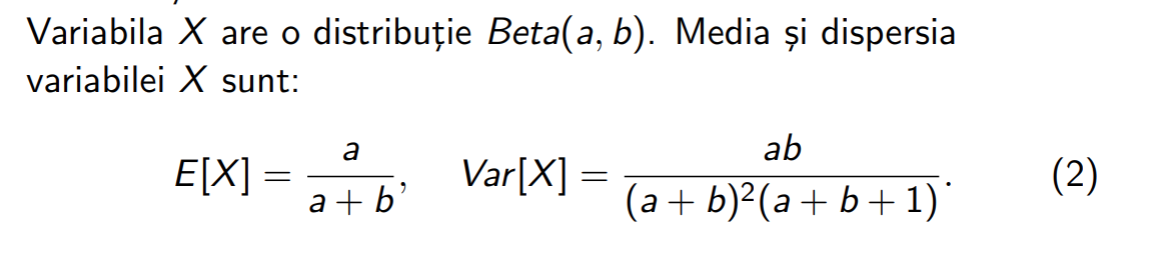

E[X] = 0.75 / 4/75 = 0.157894...
Var[X] =  3/((4.75)^2 * (5.75)) = 3/(22.5625 * 5.75) = 3 / 129.734375 = 0.02312417...

In [22]:
def test_var_beta(n,a,b,Beta):
    beta = Beta(a,b)
    media = 0 
    for i in range(0,n):
        media += beta.generateX()
    media /=n

    dispersie = 1/(n-1) 

    suma_dispersie = 0 

    for i in range(0,n):
        suma_dispersie += pow(media - beta.generateX() , 2 )

    dispersie *=suma_dispersie
    print(f"Media actuala : {a/(a+b)}")
    print(f"Media calculata pentru {n} variabile aleatoare : {media}")
    print(f"Dispersia actuala : {a*b/(pow(a+b,2)*(a+b+1))}")
    print(f"Dispersia calculata pentru {n} variabile aleatoare : {dispersie}")

test_var_beta(100000,0.75,4,Beta)

Media actuala : 0.15789473684210525
Media calculata pentru 100000 variabile aleatoare : 0.15843629484007696
Dispersia actuala : 0.023124171986029146
Dispersia calculata pentru 100000 variabile aleatoare : 0.023129467401398016


Metoda 2 pentru Beta(0.75,4) . 

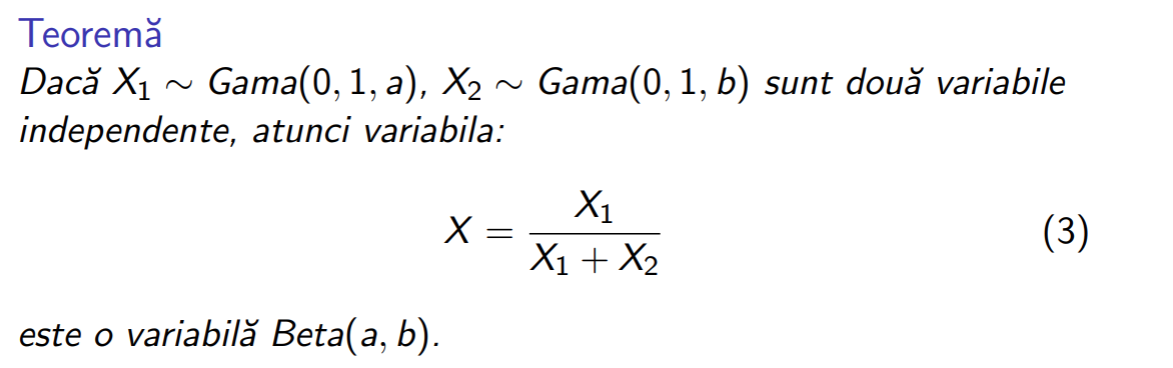

In [23]:
num = np.random.gamma(shape = 1, scale = 0.75, size = 1)
num

class Beta2:
    def __init__(self,a,b) -> None:
        self._a = a
        self._b = b

    
    def generateX(self):
        X1 = np.random.gamma(shape = self._a, scale = 1, size = None)
        X2 = np.random.gamma(shape = self._b, scale = 1, size = None)
        return X1/(X1+X2)
test_var_beta(100000,0.75,4,Beta2)  

Media actuala : 0.15789473684210525
Media calculata pentru 100000 variabile aleatoare : 0.15748419666900118
Dispersia actuala : 0.023124171986029146
Dispersia calculata pentru 100000 variabile aleatoare : 0.023174937008891332


Să se
genereze variabila hipergeometrică cu parametrii citiți de la tastatură
(curs 7).



In [24]:
class HyperGeom:
    def __init__(self,A,B,n)->None:
        self._A = A 
        self._B = B 
        self._n = n
        self._N = A + B
        self._p = A/(self._N)

    def generateX(self):
        X = 0
        for _ in range(0,self._n):
            if random.random() < self._p:
                X+=1
                S=1
            else:
                S=0
            self._N-=1
            self._A-=S 
            self._p=self._A/self._N
        return X



Verificare folosind Media si dispersia variabilei hipergeometrice 

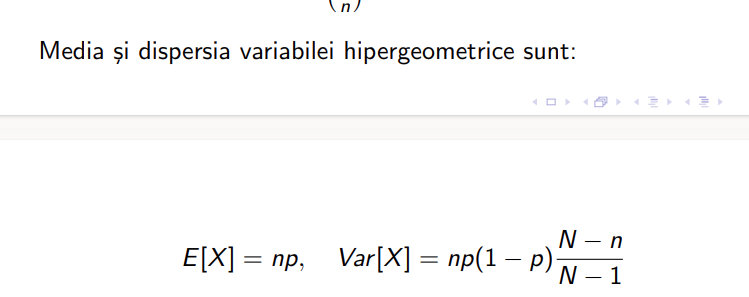

In [25]:
A = 67
B = 100 
n = 50 

nr_var = 100000
medie = 0 

for _ in range(0,nr_var):
    medie+=HyperGeom(A,B,n).generateX()

medie/=nr_var

print(f"numar bile albe : {A}")
print(f"numar bile negre : {B}")
print(f"numar extrageri : {n}")
print(f"numar de simulari : {nr_var}")
p = (A/(A+B))
N = A + B
print(f"medie calculata : {n*p}")
print(f"medie simulata : {medie}")

dispersie = 1/(nr_var-1)
suma_dispersie = 0

for _ in range(0,nr_var):
    suma_dispersie+=pow(medie-HyperGeom(A,B,n).generateX(),2)

dispersie*=suma_dispersie

print(f"dispersia calculata : {n*p*(1-p)*(N-n)/(N-1)}")
print(f"dispersia simulata : {dispersie}")

numar bile albe : 67
numar bile negre : 100
numar extrageri : 50
numar de simulari : 100000
medie calculata : 20.059880239520957
medie simulata : 20.06252
dispersia calculata : 8.46622173012031
dispersia simulata : 8.476705719059627
